In [1]:
import pandas as pd
import pyodbc
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plot

In [2]:
strings = {'servername': r'LAPTOP-EQ5HHEML\SQLEXPRESS',
      'database': 'datawarehouse',
      'password': '',
      'username': r'LAPTOP-EQ5HHEML\itsum'}

conn_str = (
    "DRIVER={SQL Server};Server=" + strings["servername"] + 
    ";Database=" + strings["database"] + 
    ";User ID=" + strings["username"] + 
    ";Password=" + strings["password"] + 
    "trusted_connection=yes;"
)

export_conn = pyodbc.connect(conn_str)
export_cursnor = export_conn.cursor()
export_cursnor

In [3]:
sales_conn = sqlite3.connect("../week 2/go_sales.sqlite")

order_details = pd.read_sql("SELECT * FROM order_details", sales_conn)
order_header = pd.read_sql("SELECT * FROM order_header", sales_conn)
product = pd.read_sql("SELECT * FROM product", sales_conn)

order_header_details = pd.merge(order_details, order_header, on="ORDER_NUMBER")
orderDF = pd.merge(order_header_details, product, on="PRODUCT_NUMBER")

df = orderDF.loc[:, ['PRODUCT_NUMBER', 'QUANTITY', 'PRODUCT_TYPE_CODE']]

df['ORDER_YEAR'] = pd.to_datetime(orderDF['ORDER_DATE']).dt.year
df['ORDER_MONTH'] = pd.to_datetime(orderDF['ORDER_DATE']).dt.month
df = df.drop_duplicates(subset=['PRODUCT_NUMBER'])


x = df.drop('QUANTITY', axis = 1)
y = df.loc[:, ['QUANTITY']]
y

#ONAFHANKELIJKHEDEN: QUANTITY ORDER_DATE PRODUCT_NUMBER PRODUCT_TYPE_CODE 

,QUANTITY
0,16
7,10
15,58
22,52
29,128
...,...
523,50
532,32
540,82
548,226


In [4]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.15,
    random_state = 42
)

y_train

,QUANTITY
483,60
211,52
444,46
540,82
58,2
...,...
493,86
63,16
435,26
201,70


In [5]:
reg_model = linear_model.LinearRegression()
reg_model = LinearRegression().fit(x_train, y_train)
reg_model

LinearRegression()

In [6]:
y_pred = reg_model.predict(x_test)
y_pred

array([[35.23147789],
       [10.79291123],
       [24.00540643],
       [39.65011232],
       [15.41128538],
       [28.51963405],
       [41.81543072],
       [42.30064983],
       [25.76495002],
       [24.66192463],
       [58.20839084],
       [32.34890284],
       [36.83213288],
       [64.58630858],
       [22.94323217],
       [14.88521514],
       [40.47781085],
       [20.48631925]])

In [7]:
pred_df = pd.DataFrame(y_pred)
pred_df = pred_df.rename(columns = {0 : "Predicted_Sales_Quantity"})
pred_df

,Predicted_Sales_Quantity
0,35.231478
1,10.792911
2,24.005406
3,39.650112
4,15.411285
5,28.519634
6,41.815431
7,42.300650
8,25.764950
9,24.661925


In [8]:
y_pred_merge = pd.concat([y_test.reset_index()['QUANTITY'], pred_df], axis = 1)
y_pred_merge.loc[y_pred_merge['Predicted_Sales_Quantity'].notna(), :]

,QUANTITY,Predicted_Sales_Quantity
0,104,35.231478
1,128,10.792911
2,16,24.005406
3,120,39.650112
4,6,15.411285
5,14,28.519634
6,150,41.815431
7,72,42.300650
8,26,25.764950
9,2,24.661925


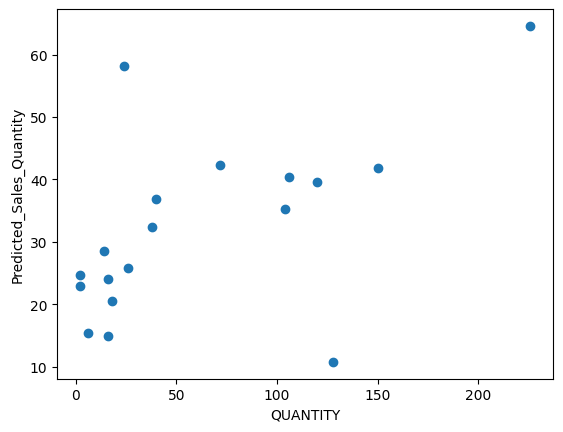

In [9]:
plot.scatter(y_pred_merge['QUANTITY'], y_pred_merge['Predicted_Sales_Quantity'])
plot.xlabel('QUANTITY')
plot.ylabel('Predicted_Sales_Quantity')
plot.show()

In [10]:
mean_absolute_error(y_pred_merge['QUANTITY'], y_pred_merge['Predicted_Sales_Quantity'])

41.86390502503491